# Emergency department visits for asthma (2010-2022) in comparison to number of 311 complaints related to indoor air quality - ventilation

In [87]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [88]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [1]:
import pandas as pd

## Reading in data on indoor environmental complaints reported to 311 from 2010 to date

In [2]:
df = pd.read_csv('DOHMH_Indoor_Environmental_Complaints.csv')

/var/folders/mb/f5zh4qyd6sbf171lrlnmff040000gn/T/ipykernel_5078/691980814.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('DOHMH_Indoor_Environmental_Complaints.csv')


In [3]:
df.head()

,Complaint_Number,Incident_Address_Street_Number,Incident_Address_Street_Name,Incident_Address,Incident_Address_Zip,Incident_Address_Borough,Complaint_Type_311,Descriptor_1_311,Complaint_Status,Date_Received,Deleted,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,T-10-07-22-0378,132,EAST 93 STREET,132 EAST 93 STREET,11212,Brooklyn,Indoor Air Quality,Chemical Vapors/Gases/Odors,05-Close,07/22/2010 02:47:42 AM,No,40.661758,-73.926186,17.0,41.0,882.0,3099894.0,3.046110e+09,Rugby-Remsen Village
1,T-10-08-16-0257,460,WEST 155 STREET,460 WEST 155 STREET,10032,Manhattan,Indoor Air Quality,Ventilation,05-Close,08/16/2010 03:02:54 PM,No,40.831178,-73.942075,9.0,7.0,23501.0,1077383.0,1.020680e+09,Hamilton Heights
2,T-10-07-22-0379,54-35,69 PLACE,54-35 69 PLACE,11378,Queens,Indoor Air Quality,Chemical Vapors/Gases/Odors,05-Close,07/22/2010 08:19:44 AM,No,40.728595,-73.894574,5.0,30.0,49302.0,4058582.0,4.025010e+09,Maspeth
3,T-10-12-06-0083,1401,67 STREET,1401 67 STREET,11219,Brooklyn,Indoor Air Quality,Other (Explain Below),05-Close,12/06/2010 09:43:55 PM,No,40.623297,-74.000195,11.0,38.0,190.0,3142596.0,3.057620e+09,Bensonhurst West
4,T-10-12-21-0337,25-35,33 STREET,25-35 33 STREET,11102,Queens,Indoor Air Quality,Other (Explain Below),05-Close,12/21/2010 11:56:04 PM,No,40.769456,-73.917088,1.0,22.0,6501.0,4009289.0,4.006310e+09,Astoria


In [4]:
df['Descriptor_1_311'].value_counts()

Descriptor_1_311
Chemical Vapors/Gases/Odors         29724
Ventilation                         15699
Other (Explain Below)               15120
Dust from Construction               9657
Sewage Odor                          8690
Public Complaint - Comm Location     4727
Sewage Leak                          1270
Human Feces                           688
Dry Cleaning Vapors (PERC)            577
Loft Building                         165
Unsafe Mold Cleanup                   150
Workplace - 10 or Less Staff           82
Unsanitary Condition                    9
Broken/Defective                        5
PAINT FUMES                             1
Asbestos                                1
Dust from construction                  1
Name: count, dtype: int64

In [5]:
import re

In [8]:
df['year'] = df['Date_Received'].str.extract(r'(\d{4})')

In [10]:
df.head()

,Complaint_Number,Incident_Address_Street_Number,Incident_Address_Street_Name,Incident_Address,Incident_Address_Zip,Incident_Address_Borough,Complaint_Type_311,Descriptor_1_311,Complaint_Status,Date_Received,Deleted,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,year
0,T-10-07-22-0378,132,EAST 93 STREET,132 EAST 93 STREET,11212,Brooklyn,Indoor Air Quality,Chemical Vapors/Gases/Odors,05-Close,07/22/2010 02:47:42 AM,No,40.661758,-73.926186,17.0,41.0,882.0,3099894.0,3.046110e+09,Rugby-Remsen Village,2010
1,T-10-08-16-0257,460,WEST 155 STREET,460 WEST 155 STREET,10032,Manhattan,Indoor Air Quality,Ventilation,05-Close,08/16/2010 03:02:54 PM,No,40.831178,-73.942075,9.0,7.0,23501.0,1077383.0,1.020680e+09,Hamilton Heights,2010
2,T-10-07-22-0379,54-35,69 PLACE,54-35 69 PLACE,11378,Queens,Indoor Air Quality,Chemical Vapors/Gases/Odors,05-Close,07/22/2010 08:19:44 AM,No,40.728595,-73.894574,5.0,30.0,49302.0,4058582.0,4.025010e+09,Maspeth,2010
3,T-10-12-06-0083,1401,67 STREET,1401 67 STREET,11219,Brooklyn,Indoor Air Quality,Other (Explain Below),05-Close,12/06/2010 09:43:55 PM,No,40.623297,-74.000195,11.0,38.0,190.0,3142596.0,3.057620e+09,Bensonhurst West,2010
4,T-10-12-21-0337,25-35,33 STREET,25-35 33 STREET,11102,Queens,Indoor Air Quality,Other (Explain Below),05-Close,12/21/2010 11:56:04 PM,No,40.769456,-73.917088,1.0,22.0,6501.0,4009289.0,4.006310e+09,Astoria,2010


In [24]:
# Total calls per year
total_per_year = df['year'].value_counts().sort_index()

# Chemical Vapors/Gases/Odors calls per year
vapors_per_year = df[df['Descriptor_1_311'] == 'Chemical Vapors/Gases/Odors']['year'].value_counts().sort_index()

# Percentage of vapors per year
percentage = (vapors_per_year / total_per_year * 100).fillna(0)

percentage

year
2010    30.786187
2011    33.124019
2012    30.532430
2013    35.033581
2014    33.327974
2015    35.799363
2016    34.080385
2017    29.825100
2018    26.872247
2019    26.301757
2020    23.103909
2021    29.315826
2022    30.732259
2023    29.027190
2024    29.120250
2025    29.363594
Name: count, dtype: float64

In [26]:
# Total calls per year
total_per_year = df['year'].value_counts().sort_index()

ventilation_per_year = df[df['Descriptor_1_311'] == 'Ventilation']['year'].value_counts().sort_index()

# Percentage of vapors per year
percentage = (ventilation_per_year / total_per_year * 100).fillna(0)

percentage

year
2010    15.393093
2011    18.190738
2012    17.018393
2013    16.373207
2014    18.890675
2015    16.809260
2016    16.299315
2017    12.764652
2018    14.310075
2019    14.272271
2020    18.326094
2021    17.816171
2022    14.786542
2023    12.918429
2024    16.043727
2025    16.939635
Name: count, dtype: float64

In [27]:
# Total calls per year
total_per_year = df['year'].value_counts().sort_index()

dust_per_year = df[df['Descriptor_1_311'] == 'Dust from Construction']['year'].value_counts().sort_index()

# Percentage of vapors per year
percentage = (dust_per_year / total_per_year * 100).fillna(0)

percentage

year
2010    10.139603
2011     9.713501
2012    11.577928
2013    10.328553
2014    11.366559
2015    12.732763
2016    14.465642
2017     9.788279
2018     8.796362
2019     9.708281
2020     9.004343
2021     5.818936
2022     7.167091
2023    10.078550
2024     9.505466
2025     8.937763
Name: count, dtype: float64

## Reading in, cleaning and merging UHF codes

In [35]:
uhf = pd.read_csv('UHF.csv')

In [36]:
uhf.head()

,full,UHF Code,minus_uhf,Borough
0,"101 Kingsbridge - Riverdale 10463, 10471",101,"Kingsbridge - Riverdale 10463, 10471",Bronx
1,"102 Northeast Bronx 10466, 10469, 10470, 10475",102,"Northeast Bronx 10466, 10469, 10470, 10475",Bronx
2,"103 Fordham - Bronx Park 10458, 10467, 10468",103,"Fordham - Bronx Park 10458, 10467, 10468",Bronx
3,"104 Pelham - Throgs Neck 10461, 10462, 10464, ...",104,"Pelham - Throgs Neck 10461, 10462, 10464, 1046...",Bronx
4,"105 Crotona - Tremont 10453, 10457, 10460",105,"Crotona - Tremont 10453, 10457, 10460",Bronx


In [38]:
uhf['zip_list'] = uhf['minus_uhf'].str.findall(r'\d{5}')

In [39]:
uhf.head()

,full,UHF Code,minus_uhf,Borough,zip_list
0,"101 Kingsbridge - Riverdale 10463, 10471",101,"Kingsbridge - Riverdale 10463, 10471",Bronx,"[10463, 10471]"
1,"102 Northeast Bronx 10466, 10469, 10470, 10475",102,"Northeast Bronx 10466, 10469, 10470, 10475",Bronx,"[10466, 10469, 10470, 10475]"
2,"103 Fordham - Bronx Park 10458, 10467, 10468",103,"Fordham - Bronx Park 10458, 10467, 10468",Bronx,"[10458, 10467, 10468]"
3,"104 Pelham - Throgs Neck 10461, 10462, 10464, ...",104,"Pelham - Throgs Neck 10461, 10462, 10464, 1046...",Bronx,"[10461, 10462, 10464, 10465, 10472, 10473]"
4,"105 Crotona - Tremont 10453, 10457, 10460",105,"Crotona - Tremont 10453, 10457, 10460",Bronx,"[10453, 10457, 10460]"


In [40]:
zip_cols = uhf['zip_list'].apply(lambda zips: (zips + [None]*6)[:6])

In [41]:
zip_df = pd.DataFrame(zip_cols.tolist(), columns=[f'zip{i+1}' for i in range(6)])

In [43]:
uhf = uhf.drop(columns='zip_list').join(zip_df)

In [44]:
uhf

,full,UHF Code,minus_uhf,Borough,zip1,zip2,zip3,zip4,zip5,zip6
0,"101 Kingsbridge - Riverdale 10463, 10471",101,"Kingsbridge - Riverdale 10463, 10471",Bronx,10463,10471,None,None,None,None
1,"102 Northeast Bronx 10466, 10469, 10470, 10475",102,"Northeast Bronx 10466, 10469, 10470, 10475",Bronx,10466,10469,10470,10475,None,None
2,"103 Fordham - Bronx Park 10458, 10467, 10468",103,"Fordham - Bronx Park 10458, 10467, 10468",Bronx,10458,10467,10468,None,None,None
3,"104 Pelham - Throgs Neck 10461, 10462, 10464, ...",104,"Pelham - Throgs Neck 10461, 10462, 10464, 1046...",Bronx,10461,10462,10464,10465,10472,10473
4,"105 Crotona - Tremont 10453, 10457, 10460",105,"Crotona - Tremont 10453, 10457, 10460",Bronx,10453,10457,10460,None,None,None
5,"106 High Bridge - Morrisania 10451, 10452, 10456",106,"High Bridge - Morrisania 10451, 10452, 10456",Bronx,10451,10452,10456,None,None,None
6,"107 Hunts Point - Mott Haven 10454, 10455, 104...",107,"Hunts Point - Mott Haven 10454, 10455, 10459, ...",Bronx,10454,10455,10459,10474,None,None
7,"201 Greenpoint 11211, 11222",201,"Greenpoint 11211, 11222",Brooklyn,11211,11222,None,None,None,None
8,"202 Downtown - Heights - Park Slope 11201, 112...",202,"Downtown - Heights - Park Slope 11201, 11205, ...",Brooklyn,11201,11205,11215,11217,11231,None
9,"203 Bedford Stuyvesant - Crown Heights 11213, ...",203,"Bedford Stuyvesant - Crown Heights 11213, 1121...",Brooklyn,11213,11212,11216,11233,11238,None


In [45]:
# Remove all 5-digit ZIP codes and trailing commas/spaces
uhf['neighborhood_name'] = uhf['minus_uhf'].str.replace(r'\d{5}', '', regex=True)
uhf['neighborhood_name'] = uhf['neighborhood_name'].str.replace(r'[,\s]+$', '', regex=True)  # remove trailing commas/spaces
uhf['neighborhood_name'] = uhf['neighborhood_name'].str.strip()

In [46]:
uhf.head()

,full,UHF Code,minus_uhf,Borough,zip1,zip2,zip3,zip4,zip5,zip6,neighborhood_name
0,"101 Kingsbridge - Riverdale 10463, 10471",101,"Kingsbridge - Riverdale 10463, 10471",Bronx,10463,10471,None,None,None,None,Kingsbridge - Riverdale
1,"102 Northeast Bronx 10466, 10469, 10470, 10475",102,"Northeast Bronx 10466, 10469, 10470, 10475",Bronx,10466,10469,10470,10475,None,None,Northeast Bronx
2,"103 Fordham - Bronx Park 10458, 10467, 10468",103,"Fordham - Bronx Park 10458, 10467, 10468",Bronx,10458,10467,10468,None,None,None,Fordham - Bronx Park
3,"104 Pelham - Throgs Neck 10461, 10462, 10464, ...",104,"Pelham - Throgs Neck 10461, 10462, 10464, 1046...",Bronx,10461,10462,10464,10465,10472,10473,Pelham - Throgs Neck
4,"105 Crotona - Tremont 10453, 10457, 10460",105,"Crotona - Tremont 10453, 10457, 10460",Bronx,10453,10457,10460,None,None,None,Crotona - Tremont


In [49]:
uhf = uhf.drop(columns={'full','minus_uhf'})

In [51]:
uhf.head()

,UHF Code,Borough,zip1,zip2,zip3,zip4,zip5,zip6,neighborhood_name
0,101,Bronx,10463,10471,None,None,None,None,Kingsbridge - Riverdale
1,102,Bronx,10466,10469,10470,10475,None,None,Northeast Bronx
2,103,Bronx,10458,10467,10468,None,None,None,Fordham - Bronx Park
3,104,Bronx,10461,10462,10464,10465,10472,10473,Pelham - Throgs Neck
4,105,Bronx,10453,10457,10460,None,None,None,Crotona - Tremont


In [55]:
# Select just the zip columns
zip_cols = ['zip1', 'zip2', 'zip3', 'zip4', 'zip5', 'zip6']

# Ensure ZIP columns are strings or NaN
uhf[zip_cols] = uhf[zip_cols].astype(str).replace({'nan': pd.NA})

# Now melt
uhf_long = uhf.melt(
    id_vars=['UHF Code', 'Borough', 'neighborhood_name'],
    value_vars=zip_cols,
    var_name='zip_column',
    value_name='zip_code'
)

# Drop missing or empty ZIP codes
uhf_long = uhf_long[uhf_long['zip_code'].notna() & (uhf_long['zip_code'] != '')]

# Drop the helper column if you want
uhf_long = uhf_long.drop(columns='zip_column').reset_index(drop=True)

print(uhf_long)

     UHF Code        Borough          neighborhood_name zip_code
0         101          Bronx    Kingsbridge - Riverdale    10463
1         102          Bronx            Northeast Bronx    10466
2         103          Bronx       Fordham - Bronx Park    10458
3         104          Bronx       Pelham - Throgs Neck    10461
4         105          Bronx          Crotona - Tremont    10453
..        ...            ...                        ...      ...
247       410         Queens                   Rockaway    11697
248       501  Staten Island              Port Richmond     None
249       502  Staten Island     Stapleton - St. George     None
250       503  Staten Island                Willowbrook     None
251       504  Staten Island  South Beach - Tottenville     None

[252 rows x 4 columns]


In [56]:
uhf_long

,UHF Code,Borough,neighborhood_name,zip_code
0,101,Bronx,Kingsbridge - Riverdale,10463
1,102,Bronx,Northeast Bronx,10466
2,103,Bronx,Fordham - Bronx Park,10458
3,104,Bronx,Pelham - Throgs Neck,10461
4,105,Bronx,Crotona - Tremont,10453
...,...,...,...,...
247,410,Queens,Rockaway,11697
248,501,Staten Island,Port Richmond,None
249,502,Staten Island,Stapleton - St. George,None
250,503,Staten Island,Willowbrook,None


In [60]:
df_uhf = df.merge(uhf_long, right_on='zip_code', left_on='Incident_Address_Zip', how='left')

In [61]:
df_uhf

,Complaint_Number,Incident_Address_Street_Number,Incident_Address_Street_Name,Incident_Address,Incident_Address_Zip,Incident_Address_Borough,Complaint_Type_311,Descriptor_1_311,Complaint_Status,Date_Received,...,Council District,Census Tract,BIN,BBL,NTA,year,UHF Code,Borough,neighborhood_name,zip_code
0,T-10-07-22-0378,132,EAST 93 STREET,132 EAST 93 STREET,11212,Brooklyn,Indoor Air Quality,Chemical Vapors/Gases/Odors,05-Close,07/22/2010 02:47:42 AM,...,41.0,882.0,3099894.0,3.046110e+09,Rugby-Remsen Village,2010,203.0,Brooklyn,Bedford Stuyvesant - Crown Heights,11212
1,T-10-08-16-0257,460,WEST 155 STREET,460 WEST 155 STREET,10032,Manhattan,Indoor Air Quality,Ventilation,05-Close,08/16/2010 03:02:54 PM,...,7.0,23501.0,1077383.0,1.020680e+09,Hamilton Heights,2010,301.0,Manhattan,Washington Heights - Inwood,10032
2,T-10-07-22-0379,54-35,69 PLACE,54-35 69 PLACE,11378,Queens,Indoor Air Quality,Chemical Vapors/Gases/Odors,05-Close,07/22/2010 08:19:44 AM,...,30.0,49302.0,4058582.0,4.025010e+09,Maspeth,2010,NaN,NaN,NaN,NaN
3,T-10-12-06-0083,1401,67 STREET,1401 67 STREET,11219,Brooklyn,Indoor Air Quality,Other (Explain Below),05-Close,12/06/2010 09:43:55 PM,...,38.0,190.0,3142596.0,3.057620e+09,Bensonhurst West,2010,206.0,Brooklyn,Borough Park,11219
4,T-10-12-21-0337,25-35,33 STREET,25-35 33 STREET,11102,Queens,Indoor Air Quality,Other (Explain Below),05-Close,12/21/2010 11:56:04 PM,...,22.0,6501.0,4009289.0,4.006310e+09,Astoria,2010,401.0,Queens,Long Island City - Astoria,11102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98447,T-25-06-05-0141,50B,JENNIFER PLACE,50B JENNIFER PLACE,10314,Staten Island,Indoor Air Quality,Other (Explain Below),04-Action Taken,06/05/2025 09:40:20 PM,...,50.0,29104.0,5127131.0,5.015488e+09,New Springville-Bloomfield-Travis,2025,NaN,NaN,NaN,NaN
98448,T-25-06-05-0142,63,ADRIAN AVENUE,63 ADRIAN AVENUE,10463,Manhattan,Indoor Air Quality,Other (Explain Below),05-Close,06/05/2025 09:48:12 PM,...,10.0,309.0,1064559.0,1.022150e+09,Marble Hill-Inwood,2025,NaN,NaN,NaN,NaN
98449,T-25-06-05-0143,2116,COLONIAL AVENUE,2116 COLONIAL AVENUE,10461,Bronx,Indoor Air Quality,Ventilation,05-Close,06/05/2025 09:51:59 PM,...,13.0,300.0,2047827.0,2.042520e+09,Pelham Bay-Country Club-City Island,2025,NaN,NaN,NaN,NaN
98450,T-25-06-05-0144,7,NAVY PIER COURT,7 NAVY PIER COURT,10304,Staten Island,Indoor Air Quality,Chemical Vapors/Gases/Odors,05-Close,06/05/2025 11:46:53 PM,...,49.0,21.0,5158986.0,5.004878e+09,Stapleton-Rosebank,2025,NaN,NaN,NaN,NaN


## Reading in data on emergency department visits for asthma in 2022

In [144]:
asthma = pd.read_csv('Asthma emergency department visits (adults) 2010_2022.csv')

In [145]:
asthma

,TimePeriod,GeoTypeDesc,GeoID,GeoRank,BoroID,Borough,Geography,Area,Number,"Estimated annual rate per 10,000","Age-adjusted rate per 10,000"
0,2022,Citywide,1,0,-,-,New York City,New York City,"35,778",53.6,54.9
1,2022,Borough,1,1,1,Bronx,Bronx,Bronx,"11,850",113.2,114.0
2,2022,Borough,2,1,2,Brooklyn,Brooklyn,Brooklyn,"10,351",51.2,52.4
3,2022,Borough,3,1,3,Manhattan,Manhattan,Manhattan,"6,700",48.8,50.1
4,2022,Borough,5,1,5,Staten Island,Staten Island,Staten Island,"1,398",36.1,38.2
...,...,...,...,...,...,...,...,...,...,...,...
761,2010,UHF 42,209,4,2,Brooklyn,Bensonhurst - Bay Ridge,Bensonhurst - Bay Ridge Brooklyn,470,27.2,27.5
762,2010,UHF 42,403,4,4,Queens,Flushing - Clearview,Flushing - Clearview Queens,529,24.5,23.9
763,2010,UHF 42,305,4,3,Manhattan,Upper East Side,Upper East Side Manhattan,397,21.1,21.9
764,2010,UHF 42,404,4,4,Queens,Bayside - Little Neck,Bayside - Little Neck Queens,129,18.0,18.3


In [146]:
asthma['GeoTypeDesc'].value_counts()

GeoTypeDesc
UHF 42                462
Community District    236
Borough                55
Citywide               13
Name: count, dtype: int64

In [147]:
asthma_uhf = asthma[asthma['GeoTypeDesc'] == 'UHF 42']

In [148]:
asthma_uhf.head()

,TimePeriod,GeoTypeDesc,GeoID,GeoRank,BoroID,Borough,Geography,Area,Number,"Estimated annual rate per 10,000","Age-adjusted rate per 10,000"
6,2022,UHF 42,107,4,1,Bronx,Hunts Point - Mott Haven,Hunts Point - Mott Haven Bronx,"1,750",174.9,175.5
7,2022,UHF 42,106,4,1,Bronx,High Bridge - Morrisania,High Bridge - Morrisania Bronx,"2,457",159.8,160.1
8,2022,UHF 42,303,4,3,Manhattan,East Harlem,East Harlem Manhattan,"1,384",152.7,155.3
9,2022,UHF 42,105,4,1,Bronx,Crotona -Tremont,Crotona -Tremont Bronx,"2,337",154.5,153.8
10,2022,UHF 42,302,4,3,Manhattan,Central Harlem - Morningside Heights,Central Harlem - Morningside Heights Manhattan,"2,045",139.0,139.0


In [155]:
asthma['TimePeriod'] = asthma['TimePeriod'].astype(str)

In [156]:
df_uhf['year'] = df_uhf['year'].astype(str)

In [157]:
df_asthma = df_uhf.merge(asthma, right_on=['GeoID','TimePeriod'], left_on=['UHF Code','year'])

In [159]:
df_asthma['TimePeriod'].value_counts()

TimePeriod
2021    13791
2022    13577
2019    12156
2020    11248
2018     6840
2014     6068
2013     5335
2016     5242
2012     5004
2011     4960
2010     2608
Name: count, dtype: int64

In [160]:
pd.set_option('display.max_columns', None)

In [161]:
df_asthma

,Complaint_Number,Incident_Address_Street_Number,Incident_Address_Street_Name,Incident_Address,Incident_Address_Zip,Incident_Address_Borough,Complaint_Type_311,Descriptor_1_311,Complaint_Status,Date_Received,Deleted,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,year,UHF Code,Borough_x,neighborhood_name,zip_code,TimePeriod,GeoTypeDesc,GeoID,GeoRank,BoroID,Borough_y,Geography,Area,Number,"Estimated annual rate per 10,000","Age-adjusted rate per 10,000"
0,T-10-07-22-0378,132,EAST 93 STREET,132 EAST 93 STREET,11212,Brooklyn,Indoor Air Quality,Chemical Vapors/Gases/Odors,05-Close,07/22/2010 02:47:42 AM,No,40.661758,-73.926186,17.0,41.0,882.0,3099894.0,3.046110e+09,Rugby-Remsen Village,2010,203.0,Brooklyn,Bedford Stuyvesant - Crown Heights,11212,2010,UHF 42,203,4,2,Brooklyn,Bedford Stuyvesant - Crown Heights,Bedford Stuyvesant - Crown Heights Brooklyn,"5,426",224.3,221.9
1,T-10-08-16-0257,460,WEST 155 STREET,460 WEST 155 STREET,10032,Manhattan,Indoor Air Quality,Ventilation,05-Close,08/16/2010 03:02:54 PM,No,40.831178,-73.942075,9.0,7.0,23501.0,1077383.0,1.020680e+09,Hamilton Heights,2010,301.0,Manhattan,Washington Heights - Inwood,10032,2010,UHF 42,301,4,3,Manhattan,Washington Heights,Washington Heights Manhattan,"1,893",94.1,94.0
2,T-10-12-06-0083,1401,67 STREET,1401 67 STREET,11219,Brooklyn,Indoor Air Quality,Other (Explain Below),05-Close,12/06/2010 09:43:55 PM,No,40.623297,-74.000195,11.0,38.0,190.0,3142596.0,3.057620e+09,Bensonhurst West,2010,206.0,Brooklyn,Borough Park,11219,2010,UHF 42,206,4,2,Brooklyn,Borough Park,Borough Park Brooklyn,693,28.6,28.9
3,T-10-12-21-0337,25-35,33 STREET,25-35 33 STREET,11102,Queens,Indoor Air Quality,Other (Explain Below),05-Close,12/21/2010 11:56:04 PM,No,40.769456,-73.917088,1.0,22.0,6501.0,4009289.0,4.006310e+09,Astoria,2010,401.0,Queens,Long Island City - Astoria,11102,2010,UHF 42,401,4,4,Queens,Long Island City - Astoria,Long Island City - Astoria Queens,"1,018",56.3,60.1
4,T-10-07-15-0240,545,EAST 144 STREET,545 EAST 144 STREET,10454,Bronx,Indoor Air Quality,Chemical Vapors/Gases/Odors,05-Close,07/15/2010 08:37:38 AM,No,40.811262,-73.915623,1.0,8.0,43.0,2090995.0,2.022710e+09,Mott Haven-Port Morris,2010,107.0,Bronx,Hunts Point - Mott Haven,10454,2010,UHF 42,107,4,1,Bronx,Hunts Point - Mott Haven,Hunts Point - Mott Haven Bronx,"2,973",311.0,307.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86824,T-14-07-02-0048,95-20,88 STREET,95-20 88 STREET,11416,Queens,Mold,Public Complaint - Comm Location,05-Close,07/02/2014 02:26:54 PM,No,40.685232,-73.853293,9.0,32.0,36.0,4187426.0,4.090250e+09,Woodhaven,2014,407.0,Queens,Southwest Queens,11416,2014,UHF 42,407,4,4,Queens,Southwest Queens,Southwest Queens Queens,"1,509",67.2,67.5
86825,T-14-10-01-0012,1131,OGDEN AVENUE,1131 OGDEN AVENUE,10452,Bronx,Indoor Air Quality,Ventilation,05-Close,10/01/2014 01:52:54 PM,No,40.836286,-73.927496,4.0,16.0,199.0,2088158.0,2.025260e+09,Highbridge,2014,106.0,Bronx,High Bridge - Morrisania,10452,2014,UHF 42,106,4,1,Bronx,High Bridge - Morrisania,High Bridge - Morrisania Bronx,"4,473",284.3,279.3
86826,T-16-02-24-0410,750,BRYANT AVENUE,750 BRYANT AVENUE,10474,Bronx,Indoor Air Quality,Chemical Vapors/Gases/Odors,05-Close,02/24/2016 03:16:50 PM,No,40.815774,-73.885852,2.0,17.0,117.0,2006567.0,2.027630e+09,Hunts Point,2016,107.0,Bronx,Hunts Point - Mott Haven,10474,2016,UHF 42,107,4,1,Bronx,Hunts Point - Mott Haven,Hunts Point - Mott Haven Bronx,"3,244",309.5,309.1
86827,T-18-03-11-0195,1621,65 STREET,1621 65 STREET,11204,Brooklyn,Indoor Air Quality,Other (Explain Below),05-Close,03/11/2018 12:26:00 PM,No,40.621567,-73.994197,11.0,38.0,252.0,3133465.0,3.055450e+09,Bensonhurst West,2018,206.0,Brooklyn,Borough Park,11204,2018,UHF 42,206,4,2,Brooklyn,Borough Park,Borough Park Brooklyn,653,28.0,28.3


In [162]:
df_asthma[df_asthma['Descriptor_1_311'] == 'Ventilation'].groupby('UHF Code').size().sort_values(ascending=False)

UHF Code
307.0    984
405.0    940
306.0    696
504.0    638
203.0    607
202.0    481
106.0    480
304.0    474
207.0    463
309.0    437
302.0    425
201.0    390
210.0    389
103.0    370
104.0    363
301.0    341
211.0    341
303.0    331
408.0    324
402.0    308
401.0    308
305.0    307
105.0    297
403.0    283
206.0    256
107.0    255
308.0    254
410.0    229
204.0    224
209.0    214
102.0    207
310.0    205
208.0    185
407.0    179
101.0    168
502.0    161
205.0    100
406.0     97
404.0     57
409.0     53
501.0     53
503.0     51
dtype: int64

In [163]:
ventilation_by_uhf = df_asthma[df_asthma['Descriptor_1_311'] == 'Ventilation'].groupby('UHF Code').size().reset_index()

In [164]:
ventilation_by_uhf.head()

,UHF Code,0
0,101.0,168
1,102.0,207
2,103.0,370
3,104.0,363
4,105.0,297


In [165]:
ventilation_by_uhf['ventilation_complaints'] = ventilation_by_uhf[0]

In [166]:
ventilation_by_uhf = ventilation_by_uhf.drop(columns=0)

In [167]:
ventilation_by_uhf.head()

,UHF Code,ventilation_complaints
0,101.0,168
1,102.0,207
2,103.0,370
3,104.0,363
4,105.0,297


In [168]:
df_asthma['Number'].dtypes

dtype('O')

In [169]:
df_asthma['Number'] = pd.to_numeric(df_asthma['Number'], errors='coerce')

In [170]:
df_asthma.groupby('UHF Code')['Number'].sum().sort_values(ascending=False)

UHF Code
306.0    2280733.0
405.0    1869214.0
304.0    1713791.0
307.0    1254949.0
301.0    1146395.0
202.0    1073991.0
206.0    1067912.0
401.0     928322.0
309.0     780600.0
210.0     748358.0
502.0     692762.0
207.0     654015.0
305.0     613977.0
410.0     606644.0
402.0     554498.0
201.0     529775.0
211.0     512496.0
403.0     498448.0
302.0     493160.0
308.0     478618.0
209.0     448459.0
409.0     410008.0
407.0     388412.0
103.0     372362.0
504.0     347098.0
203.0     320358.0
101.0     312777.0
208.0     312763.0
104.0     311435.0
205.0     300467.0
501.0     283356.0
107.0     189199.0
408.0     187057.0
310.0     169503.0
106.0     139233.0
406.0     127947.0
503.0     104378.0
105.0      75691.0
404.0      75317.0
102.0      30290.0
303.0          0.0
204.0          0.0
Name: Number, dtype: float64

In [171]:
asthma_by_uhf = df_asthma.groupby('UHF Code')['Number'].sum().reset_index()

In [172]:
asthma_by_uhf

,UHF Code,Number
0,101.0,312777.0
1,102.0,30290.0
2,103.0,372362.0
3,104.0,311435.0
4,105.0,75691.0
5,106.0,139233.0
6,107.0,189199.0
7,201.0,529775.0
8,202.0,1073991.0
9,203.0,320358.0


In [173]:
asthma_by_uhf['asthma_er_visits'] = asthma_by_uhf['Number']

In [174]:
asthma_by_uhf = asthma_by_uhf.drop(columns='Number')

In [175]:
uhf_asthma_and_complaints = asthma_by_uhf.merge(ventilation_by_uhf, on='UHF Code', how='left')

In [176]:
uhf_asthma_and_complaints

,UHF Code,asthma_er_visits,ventilation_complaints
0,101.0,312777.0,168
1,102.0,30290.0,207
2,103.0,372362.0,370
3,104.0,311435.0,363
4,105.0,75691.0,297
5,106.0,139233.0,480
6,107.0,189199.0,255
7,201.0,529775.0,390
8,202.0,1073991.0,481
9,203.0,320358.0,607


In [177]:
uhf_asthma_and_complaints.to_csv('uhf_asthma_and_complaints.csv', index=False)

In [178]:
df_asthma.to_csv('complaints_asthma.csv', index=False)

## Exploratory visualizations and statistics in R

In [179]:
%%R

df_asthma <- read.csv('uhf_asthma_and_complaints.csv')

In [180]:
%%R

colnames(df_asthma)

[1] "UHF.Code"               "asthma_er_visits"       "ventilation_complaints"


In [181]:
%%R

library(ggplot2)

`geom_smooth()` using formula = 'y ~ x'


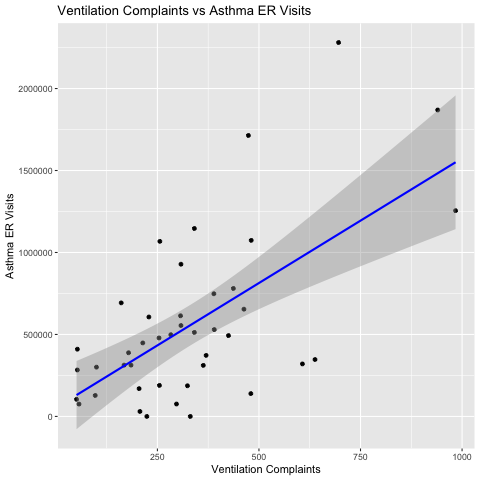

In [182]:
%%R

ggplot(df_asthma) +
  aes(x = ventilation_complaints, y = asthma_er_visits) + 
  geom_point() +
  geom_smooth(method = "lm", se = TRUE, color = "blue") +
  labs(title = "Ventilation Complaints vs Asthma ER Visits",
       x = "Ventilation Complaints",
       y = "Asthma ER Visits")

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: The following aesthetics were dropped during statistical transformation: label.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor? 



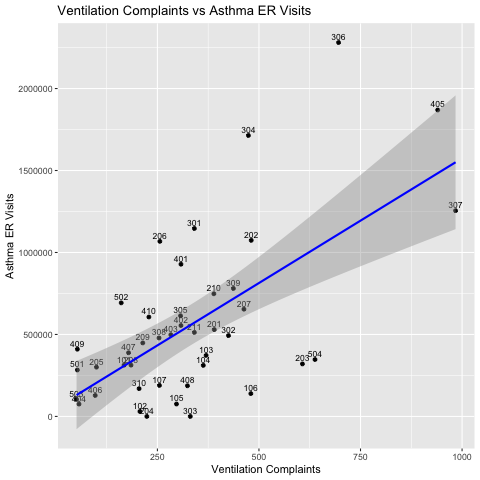

In [183]:
%%R

ggplot(df_asthma) +
  aes(x = ventilation_complaints, y = asthma_er_visits, label = UHF.Code) + 
  geom_point() +
  geom_text(vjust = -0.5, size = 3) +
  geom_smooth(method = "lm", se = TRUE, color = "blue") +
  labs(
    title = "Ventilation Complaints vs Asthma ER Visits",
    x = "Ventilation Complaints",
    y = "Asthma ER Visits"
  )

### Ridgewood - Forest Hills, Queens, and Chelsea - Clinton, Manhattan neighborhoods have high number of asthma ER visits and ventilation complaints

In [184]:
%%R

require('tidyverse')
require('DescTools')

In [185]:
%%R 
model <- lm(asthma_er_visits ~ ventilation_complaints, data=df_asthma)
summary(model)


Call:
lm(formula = asthma_er_visits ~ ventilation_complaints, data = df_asthma)

Residuals:
    Min      1Q  Median      3Q     Max 
-676573 -249520   -8507  138448 1168787 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             52647.3   115379.1   0.456    0.651    
ventilation_complaints   1522.0      294.8   5.163 7.02e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 397500 on 40 degrees of freedom
Multiple R-squared:    0.4,	Adjusted R-squared:  0.385 
F-statistic: 26.66 on 1 and 40 DF,  p-value: 7.023e-06



### There is a statistically significant relationship between the number of ventilation-related 311 complaints and the number of visits to the ER for asthma in a UHF zone, from 2010-2022.